In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

# Generate data via two Gaussians

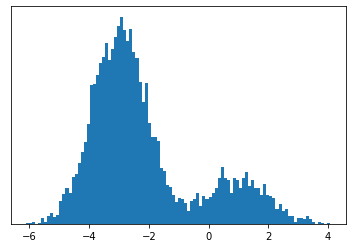

In [25]:
m1 = 1
m2 = -3

var1 = 1
var2 = 0.8

N = 5000

P1 = 0.2
P2 = 1-P1

data = []

for _ in range(N):
    p_unif = np.random.uniform()
    if p_unif < P1:
        mean = m1
        var = var1
    else:
        mean = m2
        var = var2
    
    data.append(np.random.normal(loc=mean, scale = np.sqrt(var)))

plt.hist(data, 100, density=True)

plt.yticks([])

plt.show()

# Choose model to be two Gaussians and define the probability density function

In [36]:
M = 2 # number of Gaussians

def p(x, mean, var):
    return (1./np.sqrt(2*np.pi*var))*np.exp(-(1/(2*var))*(x-mean)**2)

# Define responsibilities, model, and update parameter functions

In [37]:
def responsibility(x, mu, var, M):
    R = [[(p(x, mu[i], var[i])*P[i])/(p(x, mu[0], var[0])*P[0] + p(x, mu[1], var[1])*P[1]) for x in data] for i in range(M)]
    
    return R

In [38]:
def model(x, mu, var, P, M):
    return sum([P[i]*p(x, mu[i], var[i]) for i in range(M)])

In [39]:
def update_par(data, R, M):
    mu = [np.dot(R[i], data)/(sum(R[i])) for i in [0,1]]
    var = [np.dot(R[i], (data - mu[i])**2)/(sum(R[i])) for i in range(M)]
    P = [np.mean(R[i]) for i in [0,1]]
    
    return [mu, var, P]

# Initialise mean, variance, mixture coefficients, and responsibilities

In [40]:
mu = [0, 0]
var = [x**2 for x in np.random.normal(size=M)]

#Mixture coef
P = [0.5, 0.5]

#Responsibility
R = responsibility(data, mu, var, M)

# Coordinate-wise ascent to optimise expected log-likelihood

<IPython.core.display.Javascript object>


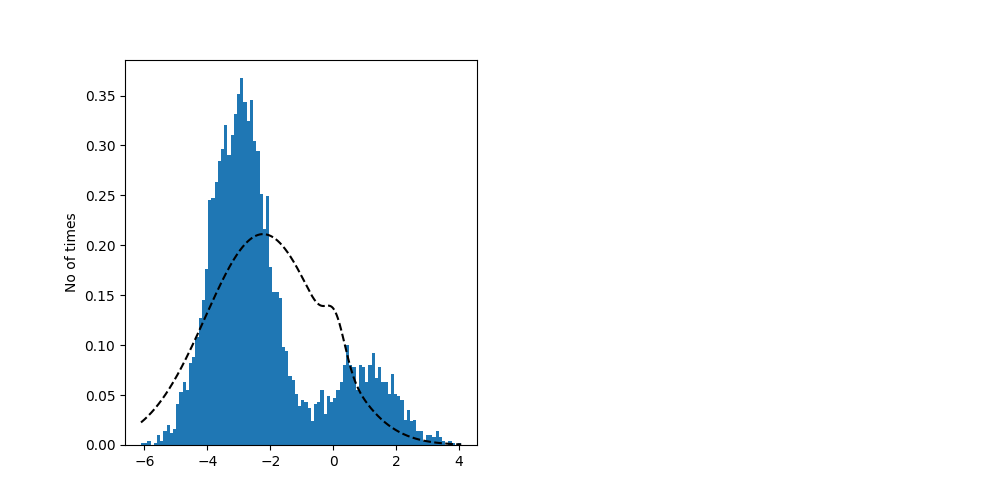

In [41]:
%matplotlib notebook
data_regrid = np.linspace(np.min(data),np.max(data), len(data))

import time

fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)

plt.ion()
fig.show()
fig.canvas.draw()


for _ in range(1):
    #update responsibilities given the current mean and variance
    R = responsibility(data, mu, var, M)
    
    #update the mean, variance, and mixture coefficients given new responsibilities
    mu, var, P = update_par(data, R, M)

    #plot new estimated model
    pdf = model(data_regrid, mu, var, P, M)

    ax1.clear()
    ax1.hist(data, 100, density=True)
    ax1.set_ylabel('No of times')
    ax1.plot(data_regrid, pdf, 'k--')
    
    fig.canvas.draw()
    time.sleep(0.01)